# This notebook demonstrates how to propagate errors in Cpx-Liquid thermobarometry
- This builds on from the notebook showing how to consider error in a single phase (Liquid_Thermometry_error_prop.ipynb). We suggest you look at that first, as its simpler when you don't have to worry about two separate phases
- We use the experimental data of Feig et al. (2010) - DOI 10.1007/s00410-010-0493-3, and the author-stated 1 sigma errors

In [1]:
import numpy as np
import pandas as pd
import sys
sys.path.append("../..")
import matplotlib.pyplot as plt
import Thermobar as pt
import sympy as sym
pd.options.display.max_columns = None

In [2]:
# Importing data

out=pt.import_excel('Cpx_Liq_Error_prop_Feig2010_example.xlsx', sheet_name="Sheet1")
my_input=out['my_input']
myCpxs1=out['Cpxs']
myLiquids1=out['Liqs']

In [3]:
# Importing errors (in publication, given as absolute errors for each oxide based on averaging of products within each experiment)

out_err=pt.import_excel_errors('Cpx_Liq_Error_prop_Feig2010_example.xlsx', sheet_name="Sheet1")
myLiquids1_err=out_err['Liqs_Err']
myCpxs1_err=out_err['Cpxs_Err']
myinput_Out=out_err['my_input_Err']

# Example 1: Uncertainty in a single input parameter
- Here, we consider the effect of adding just 5% noise to measured Na2O contents of Cpx (a fairly typical uncertainty resulting from EPMA analyses)
- Because our liquids and cpx dataframes need to be the same size to feed into the calculate_Cpx_Liq functions, we also use the add_noise_sample_1phase to generate a dataframe of Liq compositions, however, we simply state noise_percent=0 so all the rows for each liquid are identical

In [4]:
# Making a liquid dataframe which is the right length, but has no noise
#-----------------------------------------------------------------------------

Liquids_only_noNoise=pt.add_noise_sample_1phase(phase_comp=myLiquids1, 
                        noise_percent=0, duplicates=1000, err_dist="normal")


In [6]:
# Add 5% noise to Na2O in Cpx
#-----------------------------------------------------------------------------

Cpx_5Na2O=pt.add_noise_sample_1phase(phase_comp=myCpxs1, variable="Na2O", 
          variable_err=5, variable_err_type="Perc", duplicates=1000, 
          err_dist="normal")

Cpx_5Na2O.head()

,SiO2_Cpx,TiO2_Cpx,Al2O3_Cpx,FeOt_Cpx,MnO_Cpx,MgO_Cpx,CaO_Cpx,Na2O_Cpx,K2O_Cpx,Cr2O3_Cpx,Sample_ID_Cpx,P_kbar,T_K,Sample_ID_Cpx_Num
0,51.075956,0.325086,4.892502,5.714957,0.1657,16.897042,20.466034,0.326181,0.0,0.252186,0.0,1.0,1293.15,0.0
1,51.075956,0.325086,4.892502,5.714957,0.1657,16.897042,20.466034,0.303485,0.0,0.252186,0.0,1.0,1293.15,0.0
2,51.075956,0.325086,4.892502,5.714957,0.1657,16.897042,20.466034,0.355728,0.0,0.252186,0.0,1.0,1293.15,0.0
3,51.075956,0.325086,4.892502,5.714957,0.1657,16.897042,20.466034,0.340121,0.0,0.252186,0.0,1.0,1293.15,0.0
4,51.075956,0.325086,4.892502,5.714957,0.1657,16.897042,20.466034,0.323036,0.0,0.252186,0.0,1.0,1293.15,0.0


## Now we input these two new dataframes into the function for calculating P and T iteratively using two equations
- here, T=equation 33 from Putirka 2008, P=Equation 31 from Putirka 2008

In [7]:
Out_5_noise_cpx=pt.calculate_cpx_liq_press_temp(liq_comps=Liquids_only_noNoise, cpx_comps=Cpx_5Na2O, 
                                    equationP="P_Put2008_eq31", equationT="T_Put2008_eq33", eq_tests=True)

Using Fe3FeT from input file to calculate Kd Fe-Mg


## Each histogram shows the pressure distribution from a single Cpx-Liquid pair resulting from adding 5% error.  

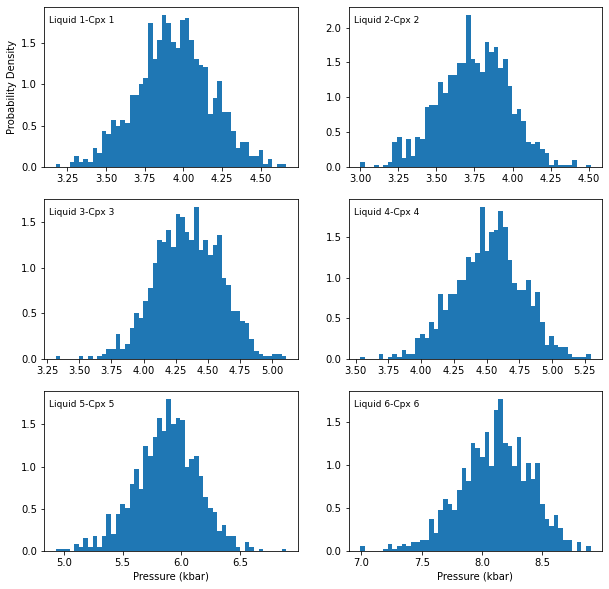

In [8]:
fig, ((ax1, ax2), (ax3, ax4), (ax5, ax6)) = plt.subplots(3, 2, figsize=(10, 10))

ax1.hist(Out_5_noise_cpx.loc[Out_5_noise_cpx['Sample_ID_Cpx_Num']==0, "P_kbar_calc"], bins=50, density = True)
ax1.annotate("Liquid 1-Cpx 1", xy=(0.02, 0.9), xycoords="axes fraction", fontsize=9)
ax2.hist(Out_5_noise_cpx.loc[Out_5_noise_cpx['Sample_ID_Cpx_Num']==1, "P_kbar_calc"], bins=50, density = True)
ax2.annotate("Liquid 2-Cpx 2", xy=(0.02, 0.9), xycoords="axes fraction", fontsize=9)
ax3.hist(Out_5_noise_cpx.loc[Out_5_noise_cpx['Sample_ID_Cpx_Num']==2, "P_kbar_calc"], bins=50, density = True)
ax3.annotate("Liquid 3-Cpx 3", xy=(0.02, 0.9), xycoords="axes fraction", fontsize=9)
ax4.hist(Out_5_noise_cpx.loc[Out_5_noise_cpx['Sample_ID_Cpx_Num']==3, "P_kbar_calc"], bins=50, density = True)
ax4.annotate("Liquid 4-Cpx 4", xy=(0.02, 0.9), xycoords="axes fraction", fontsize=9)
ax5.hist(Out_5_noise_cpx.loc[Out_5_noise_cpx['Sample_ID_Cpx_Num']==4, "P_kbar_calc"], bins=50, density = True)
ax5.annotate("Liquid 5-Cpx 5", xy=(0.02, 0.9), xycoords="axes fraction", fontsize=9)
ax6.hist(Out_5_noise_cpx.loc[Out_5_noise_cpx['Sample_ID_Cpx_Num']==5, "P_kbar_calc"], bins=50, density = True)
ax6.annotate("Liquid 6-Cpx 6", xy=(0.02, 0.9), xycoords="axes fraction", fontsize=9)

ax6.set_xlabel('Pressure (kbar)')
ax5.set_xlabel('Pressure (kbar)')
ax1.set_ylabel('Probability Density')
plt.rcParams['figure.dpi']= 300

# Smaller plot used in the manuscript

C:\Users\penny\anaconda3\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


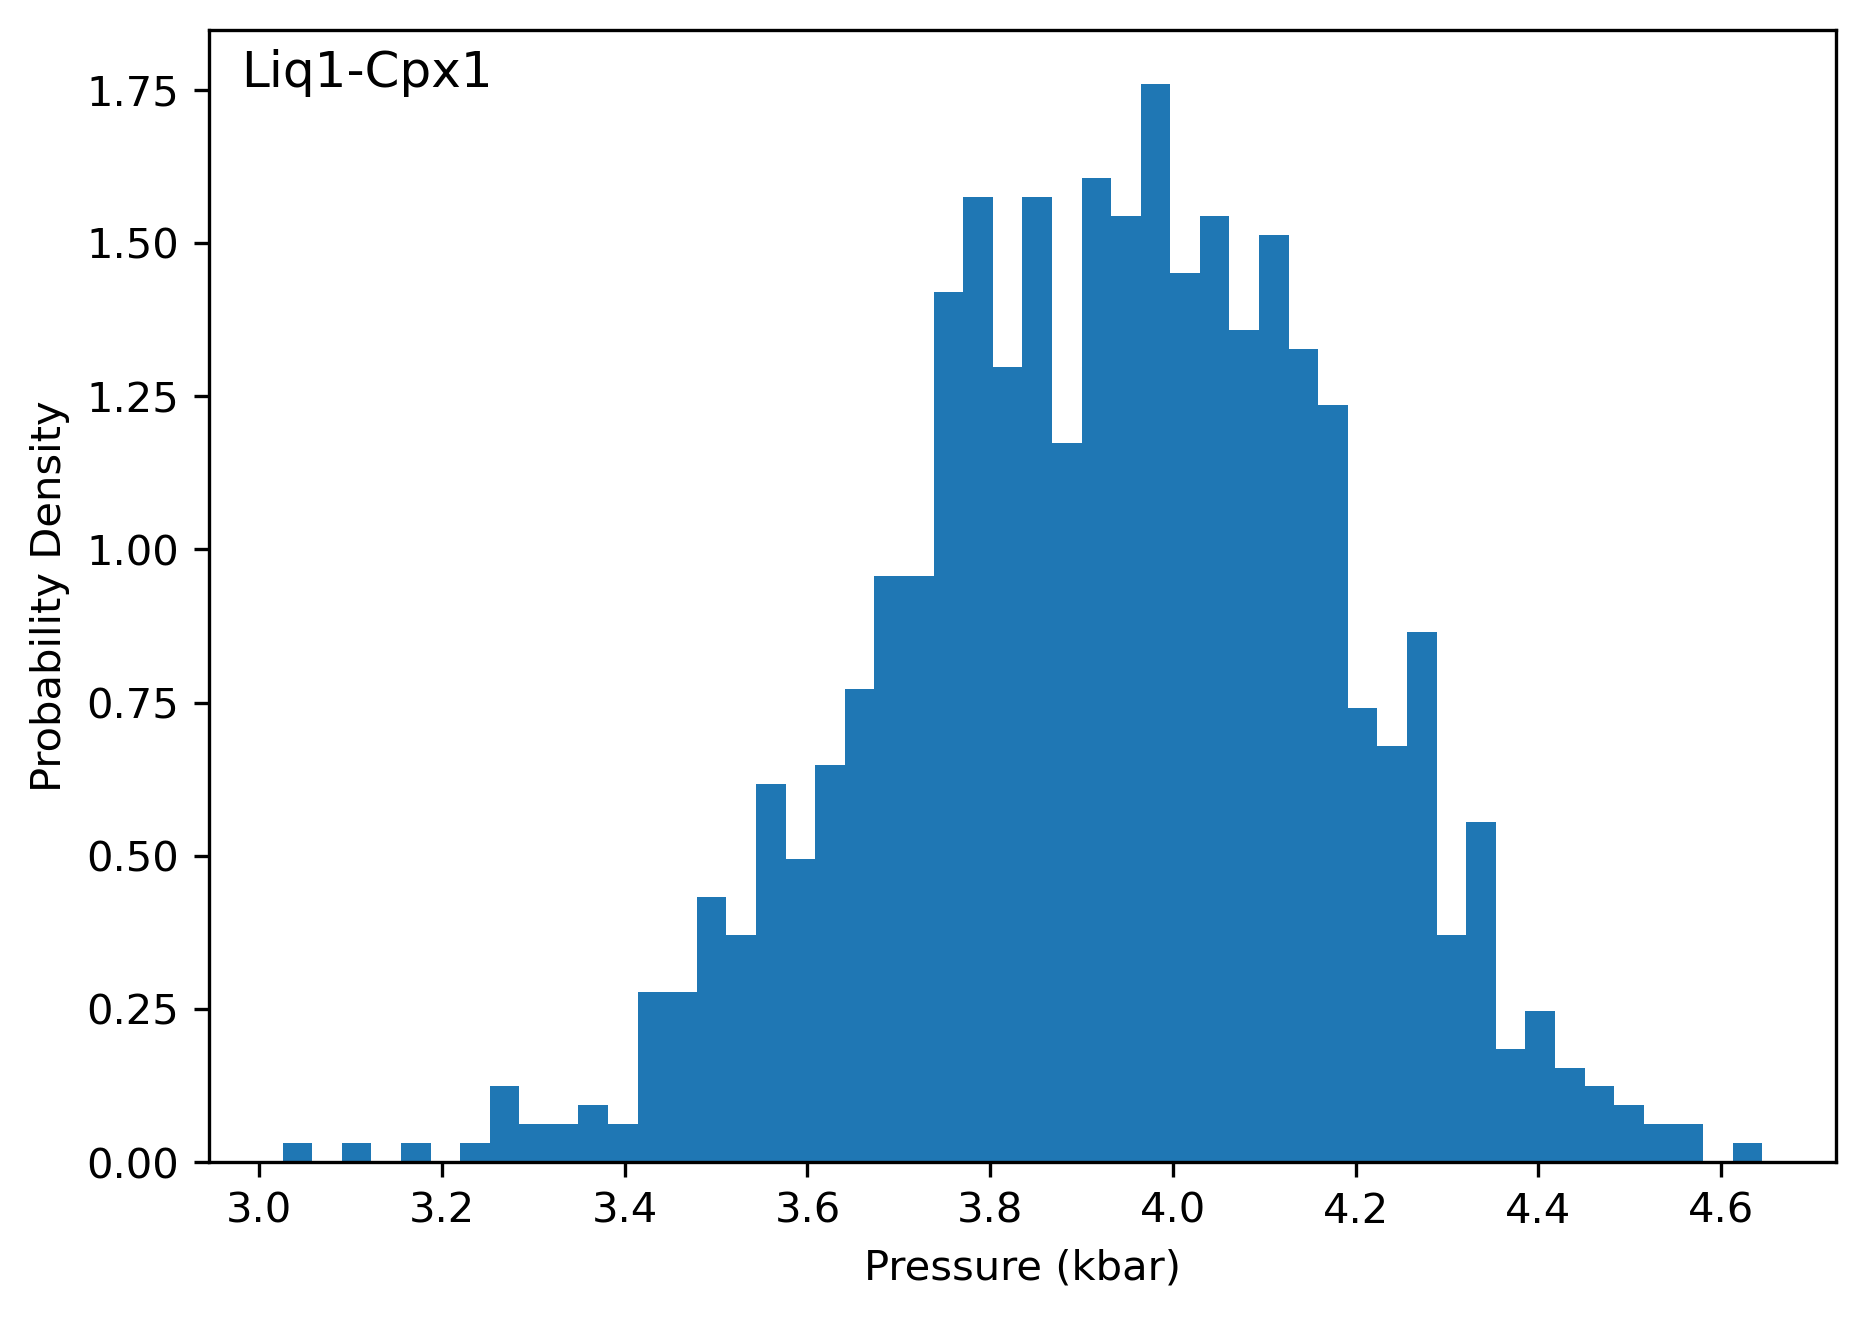

In [8]:
fig, ((ax1)) = plt.subplots(1, 1, figsize=(7, 5))
ax1.hist(Out_5_noise_cpx.loc[Out_5_noise_cpx['Sample_ID_Cpx_Num']==0, 
                             "P_kbar_calc"], bins=50, density = True)
ax1.annotate("Liq1-Cpx1", xy=(0.02, 0.95), xycoords="axes fraction",
             fontsize=12)
ax1.set_xlabel('Pressure (kbar)')
ax1.set_ylabel('Probability Density')
fig.savefig('5%error_cpx.png', dpi=300)


## We can plot the same diagram but for temperatures

C:\Users\penny\anaconda3\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


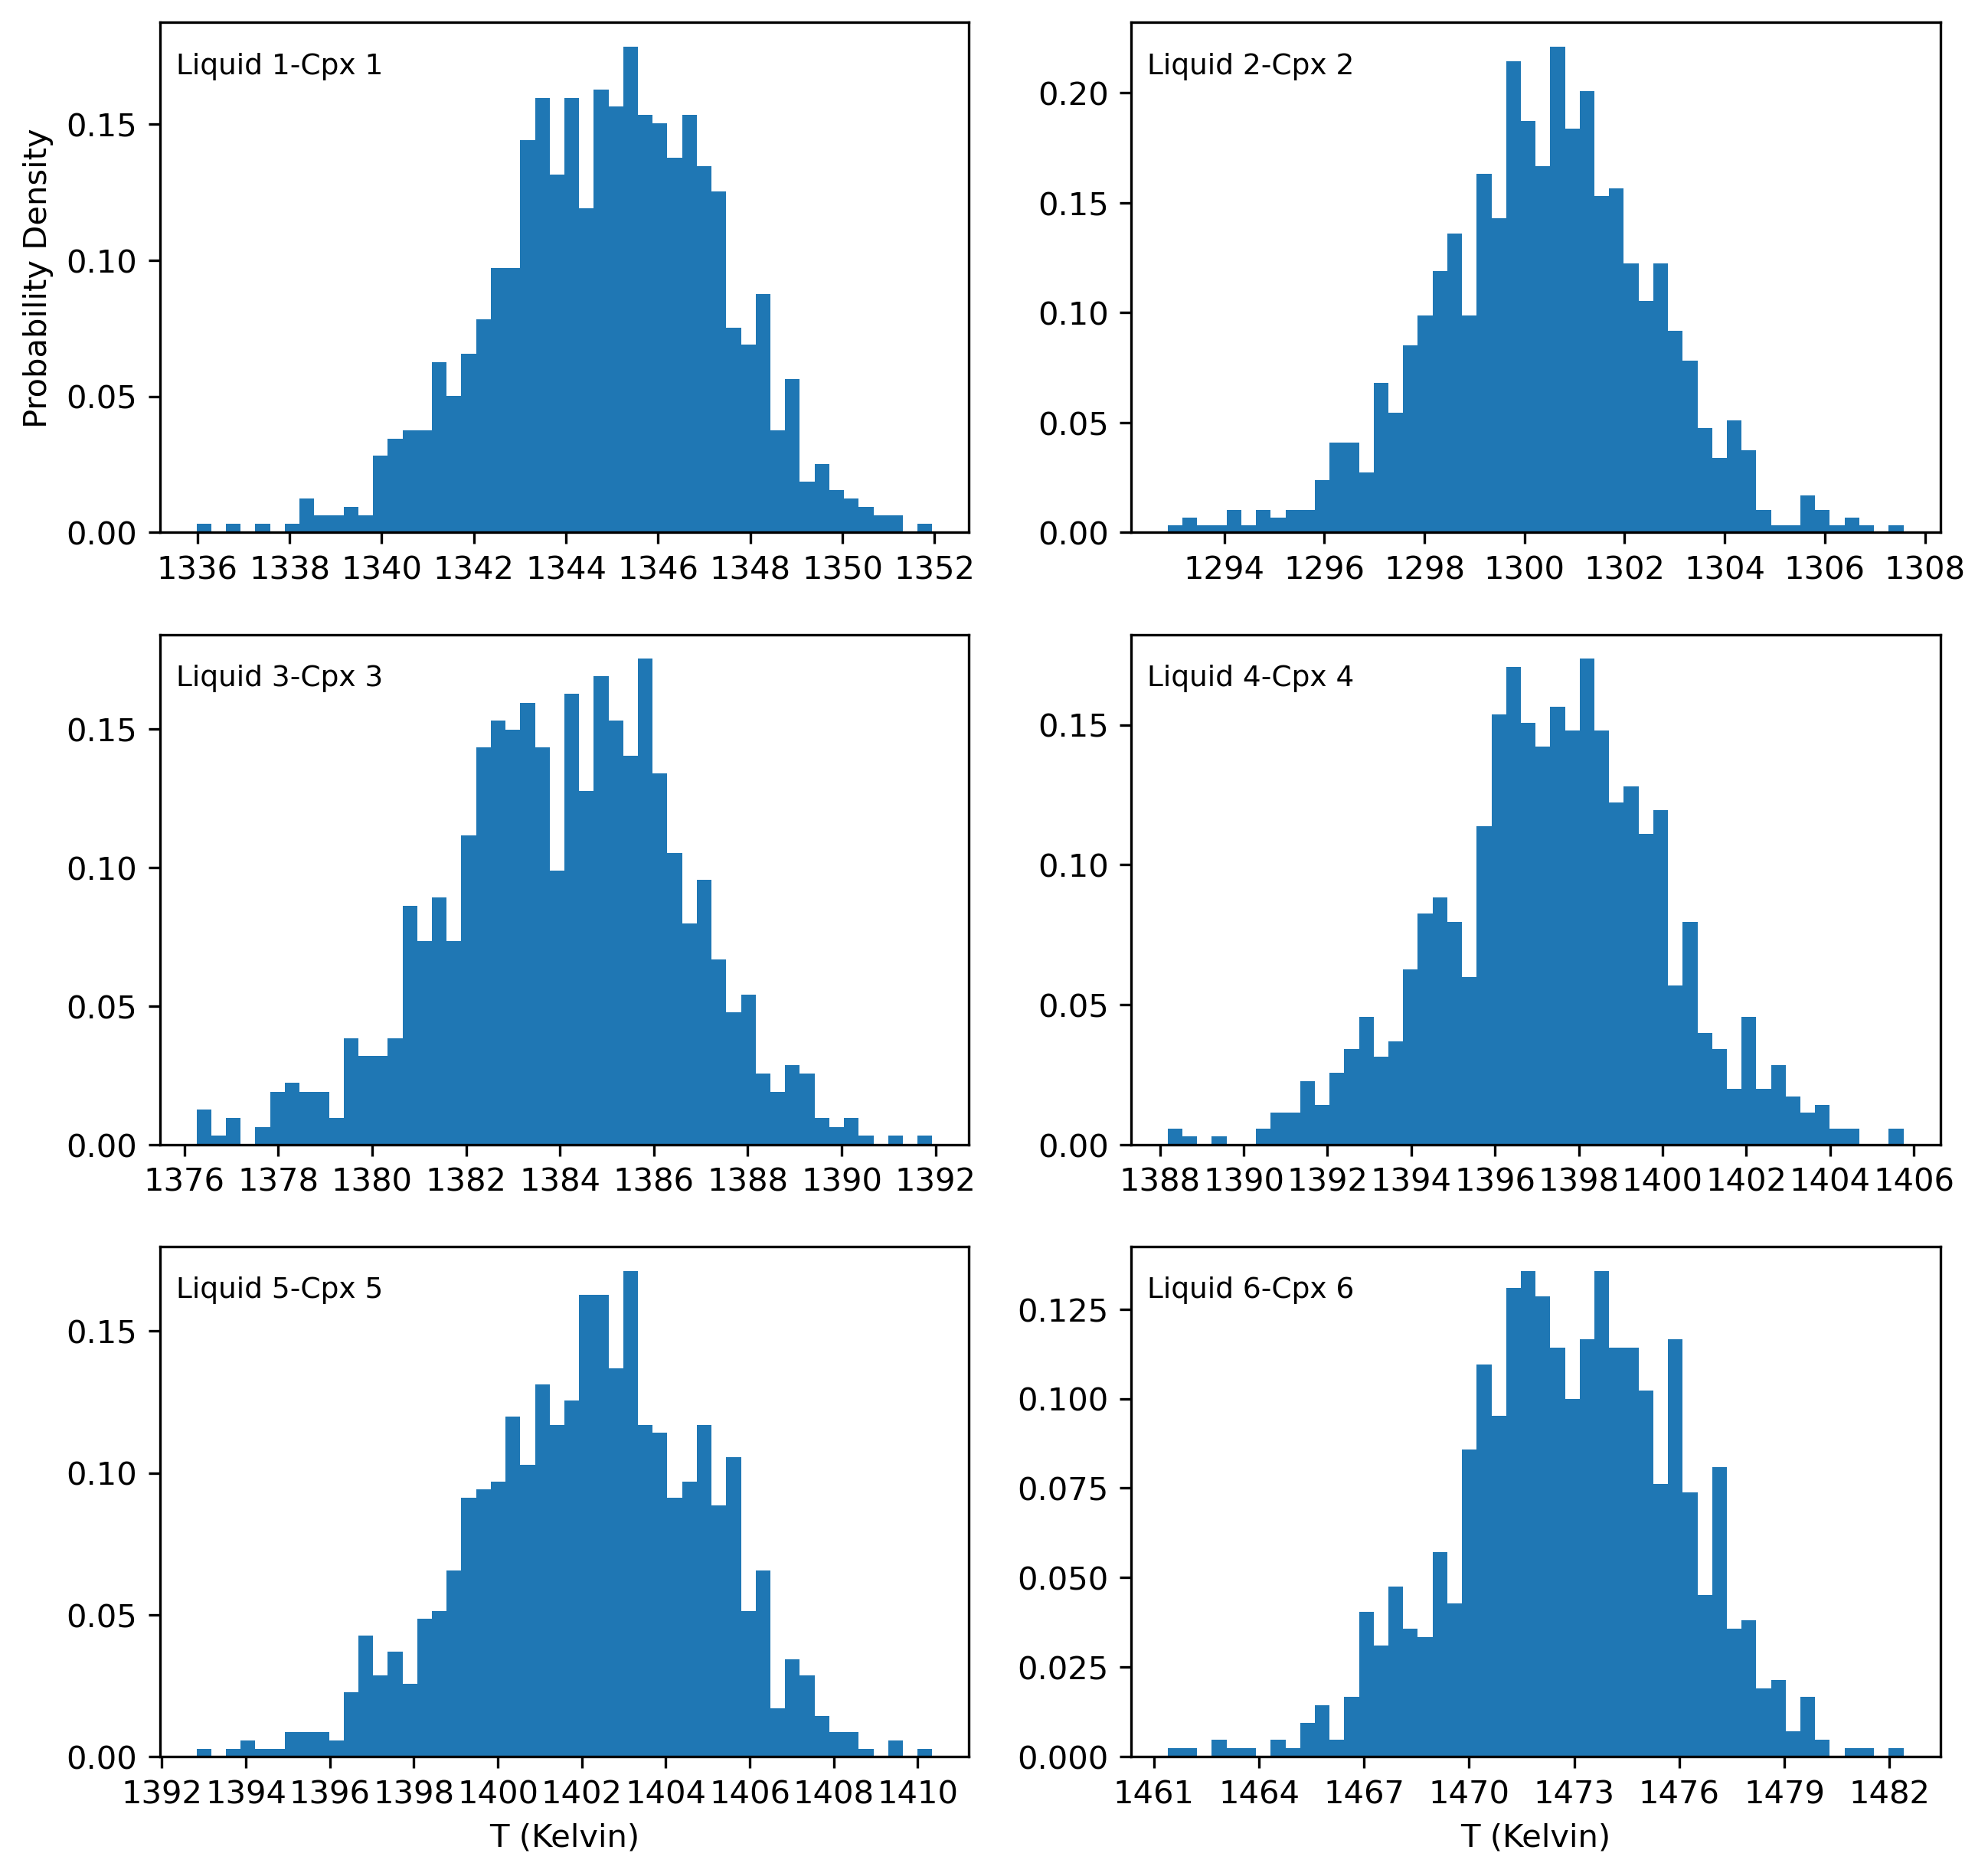

In [9]:
fig, ((ax1, ax2), (ax3, ax4), (ax5, ax6)) = plt.subplots(3, 2, figsize=(10, 10))

ax1.hist(Out_5_noise_cpx.loc[Out_5_noise_cpx['Sample_ID_Cpx_Num']==0, "T_K_calc"], bins=50, density = True)
ax1.annotate("Liquid 1-Cpx 1", xy=(0.02, 0.9), xycoords="axes fraction", fontsize=9)
ax2.hist(Out_5_noise_cpx.loc[Out_5_noise_cpx['Sample_ID_Cpx_Num']==1, "T_K_calc"], bins=50, density = True)
ax2.annotate("Liquid 2-Cpx 2", xy=(0.02, 0.9), xycoords="axes fraction", fontsize=9)
ax3.hist(Out_5_noise_cpx.loc[Out_5_noise_cpx['Sample_ID_Cpx_Num']==2, "T_K_calc"], bins=50, density = True)
ax3.annotate("Liquid 3-Cpx 3", xy=(0.02, 0.9), xycoords="axes fraction", fontsize=9)
ax4.hist(Out_5_noise_cpx.loc[Out_5_noise_cpx['Sample_ID_Cpx_Num']==3, "T_K_calc"], bins=50, density = True)
ax4.annotate("Liquid 4-Cpx 4", xy=(0.02, 0.9), xycoords="axes fraction", fontsize=9)
ax5.hist(Out_5_noise_cpx.loc[Out_5_noise_cpx['Sample_ID_Cpx_Num']==4, "T_K_calc"], bins=50, density = True)
ax5.annotate("Liquid 5-Cpx 5", xy=(0.02, 0.9), xycoords="axes fraction", fontsize=9)
ax6.hist(Out_5_noise_cpx.loc[Out_5_noise_cpx['Sample_ID_Cpx_Num']==5, "T_K_calc"], bins=50, density = True)
ax6.annotate("Liquid 6-Cpx 6", xy=(0.02, 0.9), xycoords="axes fraction", fontsize=9)

ax5.set_xlabel('T (Kelvin)')
ax6.set_xlabel('T (Kelvin)')
ax1.set_ylabel('Probability Density')
plt.rcParams['figure.dpi']= 200
from pylab import MaxNLocator
ax1.xaxis.set_major_locator(MaxNLocator(integer = True))
ax2.xaxis.set_major_locator(MaxNLocator(integer = True))
ax3.xaxis.set_major_locator(MaxNLocator(integer = True))
ax4.xaxis.set_major_locator(MaxNLocator(integer = True))
ax5.xaxis.set_major_locator(MaxNLocator(integer = True))
ax6.xaxis.set_major_locator(MaxNLocator(integer = True))

### Again, we can use the function Av_Noise_Samples to calculate the mean, median, max, min and standard deviation 

In [10]:
Stats_T_K=pt.av_noise_samples_series(Out_5_noise_cpx['T_K_calc'], Out_5_noise_cpx['Sample_ID_Liq_Num'])
Stats_T_K

C:\Users\penny\anaconda3\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,Sample,Mean_calc,Median_calc,St_dev_calc,Max_calc,Min_calc
0,0.0,1344.914168,1345.067187,2.405863,1351.950648,1335.979995
1,1.0,1300.371776,1300.459593,2.173506,1307.571055,1292.872065
2,2.0,1384.067835,1384.213147,2.522214,1391.930447,1376.259981
3,3.0,1397.416719,1397.437470,2.669028,1405.752115,1388.186658
4,4.0,1402.193409,1402.329356,2.732338,1410.344466,1392.823173
5,5.0,1472.847578,1472.895200,3.114801,1482.399351,1461.395160
6,6.0,1480.687894,1480.732271,3.229931,1492.873490,1470.155298


In [11]:
Stats_P_kbar=pt.av_noise_samples_series(Out_5_noise_cpx['P_kbar_calc'], Out_5_noise_cpx['Sample_ID_Liq_Num'])
Stats_P_kbar

C:\Users\penny\anaconda3\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,Sample,Mean_calc,Median_calc,St_dev_calc,Max_calc,Min_calc
0,0.0,3.931475,3.946997,0.243901,4.644789,3.025552
1,1.0,3.738238,3.747456,0.228931,4.496929,2.948560
2,2.0,4.356100,4.370495,0.249792,5.134815,3.582764
3,3.0,4.495512,4.497558,0.260705,5.309583,3.593664
4,4.0,5.886724,5.900001,0.266978,6.683286,4.971124
5,5.0,8.088886,8.093325,0.292682,8.986851,7.013024
6,6.0,6.209474,6.213628,0.294021,7.317314,5.249550


# Example 2 - published absolute 1 sigma values for all oxides
- Here, we use the 1 sigma values for each oxide in both the glass and cpx reported by Feig et al. 2010
- We make a noisy dataframe of the same length for liquids and cpxs, then combine them into the function for iterating P and T

In [12]:
Liquids_st_noise=pt.add_noise_sample_1phase(phase_comp=myLiquids1, phase_err=myLiquids1_err,
                                             phase_err_type="Abs", duplicates=1000, err_dist="normal")

Cpxs_st_noise=pt.add_noise_sample_1phase(phase_comp=myCpxs1, phase_err=myCpxs1_err,
                                             phase_err_type="Abs", duplicates=1000, err_dist="normal")


C:\Users\penny\anaconda3\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


All negative numbers replaced with zeros. If you wish to keep these, set positive=False
All negative numbers replaced with zeros. If you wish to keep these, set positive=False


In [13]:
Out_st_noise=pt.calculate_cpx_liq_press_temp(liq_comps=Liquids_st_noise, cpx_comps=Cpxs_st_noise, 
                                    equationP="P_Put2008_eq31", 
                                             equationT="T_Put2008_eq33", eq_tests=True)


C:\Users\penny\anaconda3\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
C:\Users\penny\anaconda3\lib\site-packages\pandas\core\arraylike.py:358: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
C:\Users\penny\anaconda3\lib\site-packages\pandas\core\arraylike.py:358: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


Using Fe3FeT from input file to calculate Kd Fe-Mg


C:\Users\penny\anaconda3\lib\site-packages\pandas\core\arraylike.py:358: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


In [14]:
Stats_T_K=pt.av_noise_samples_series(Out_st_noise['T_K_calc'], Liquids_st_noise['Sample_ID_Liq_Num'])
Stats_T_K

C:\Users\penny\anaconda3\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,Sample,Mean_calc,Median_calc,St_dev_calc,Max_calc,Min_calc
0,0.0,1344.806439,1344.617073,11.543317,1386.110045,1307.112145
1,1.0,1298.416838,1299.602428,15.234579,1340.986902,1154.133823
2,2.0,1380.602476,1382.986627,23.906488,1434.778444,1207.199358
3,3.0,1397.442592,1398.207418,10.401445,1426.852426,1362.744428
4,4.0,1402.314149,1402.158809,10.728163,1435.048119,1364.405996
5,5.0,1472.949640,1472.956796,6.740373,1494.802886,1448.412000
6,6.0,1480.184311,1480.165491,8.894992,1504.413287,1454.066297


In [15]:
Stats_P_kbar=pt.av_noise_samples_series(Out_st_noise['P_kbar_calc'], Liquids_st_noise['Sample_ID_Liq_Num'])
Stats_P_kbar

C:\Users\penny\anaconda3\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,Sample,Mean_calc,Median_calc,St_dev_calc,Max_calc,Min_calc
0,0.0,3.875596,3.949001,0.858457,6.411983,0.759976
1,1.0,3.553989,3.721227,1.385405,6.803979,-12.160766
2,2.0,4.036677,4.387722,2.200641,8.927298,-13.024076
3,3.0,4.510287,4.539950,0.882661,7.069357,1.349499
4,4.0,5.880459,5.910855,0.886907,8.325613,2.727072
5,5.0,8.109641,8.125380,0.457281,9.737257,6.353737
6,6.0,6.217177,6.250715,0.515500,7.702536,4.300681


## Example shown in manuscript (just 2 cpxs)

C:\Users\penny\anaconda3\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


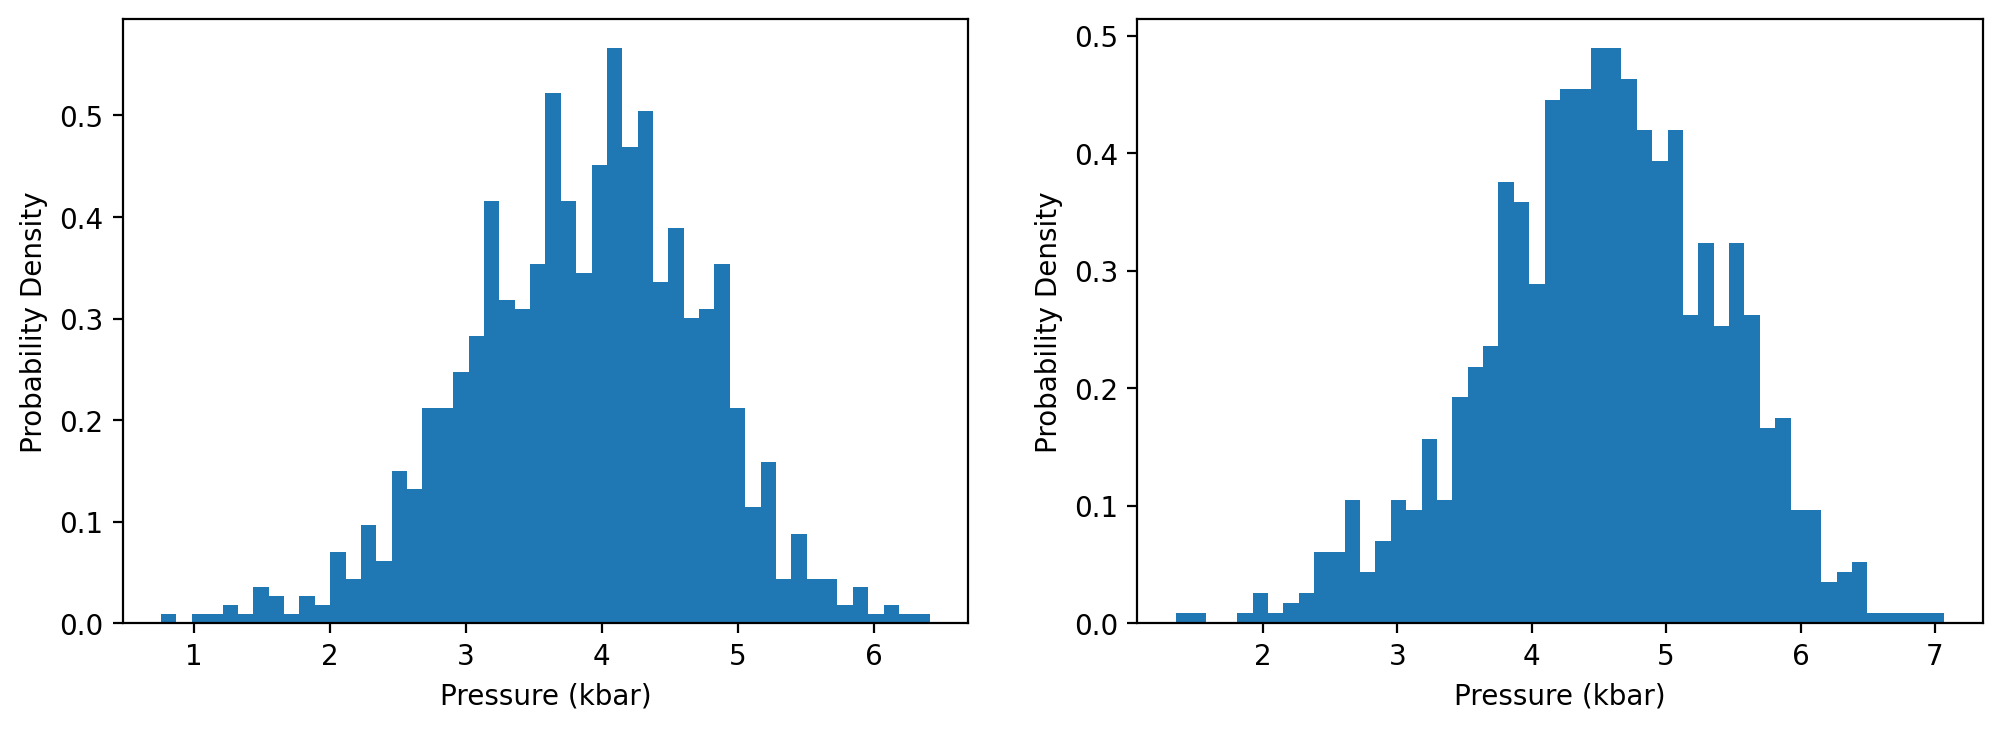

In [16]:
fig, ((ax1, ax2)) = plt.subplots(1, 2, figsize=(12, 4))

ax1.hist(Out_st_noise.loc[Out_st_noise['Sample_ID_Liq_Num']==0, "P_kbar_calc"], bins=50, density = True)
ax2.hist(Out_st_noise.loc[Out_st_noise['Sample_ID_Liq_Num']==3, "P_kbar_calc"], bins=50, density = True)
#ax2.set_xlim([0, 6])
ax1.set_xlabel('Pressure (kbar)')
ax2.set_xlabel('Pressure (kbar)')
ax1.set_ylabel('Probability Density')
ax2.set_ylabel('Probability Density')
fig.savefig('Manuscript_2CpxNoises.png', dpi=300, transparent=True)

# 6 Cpxs
- can average by _Cpx or _Liq, doesnt matter, as will match

C:\Users\penny\anaconda3\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Text(0, 0.5, 'Probability Density')

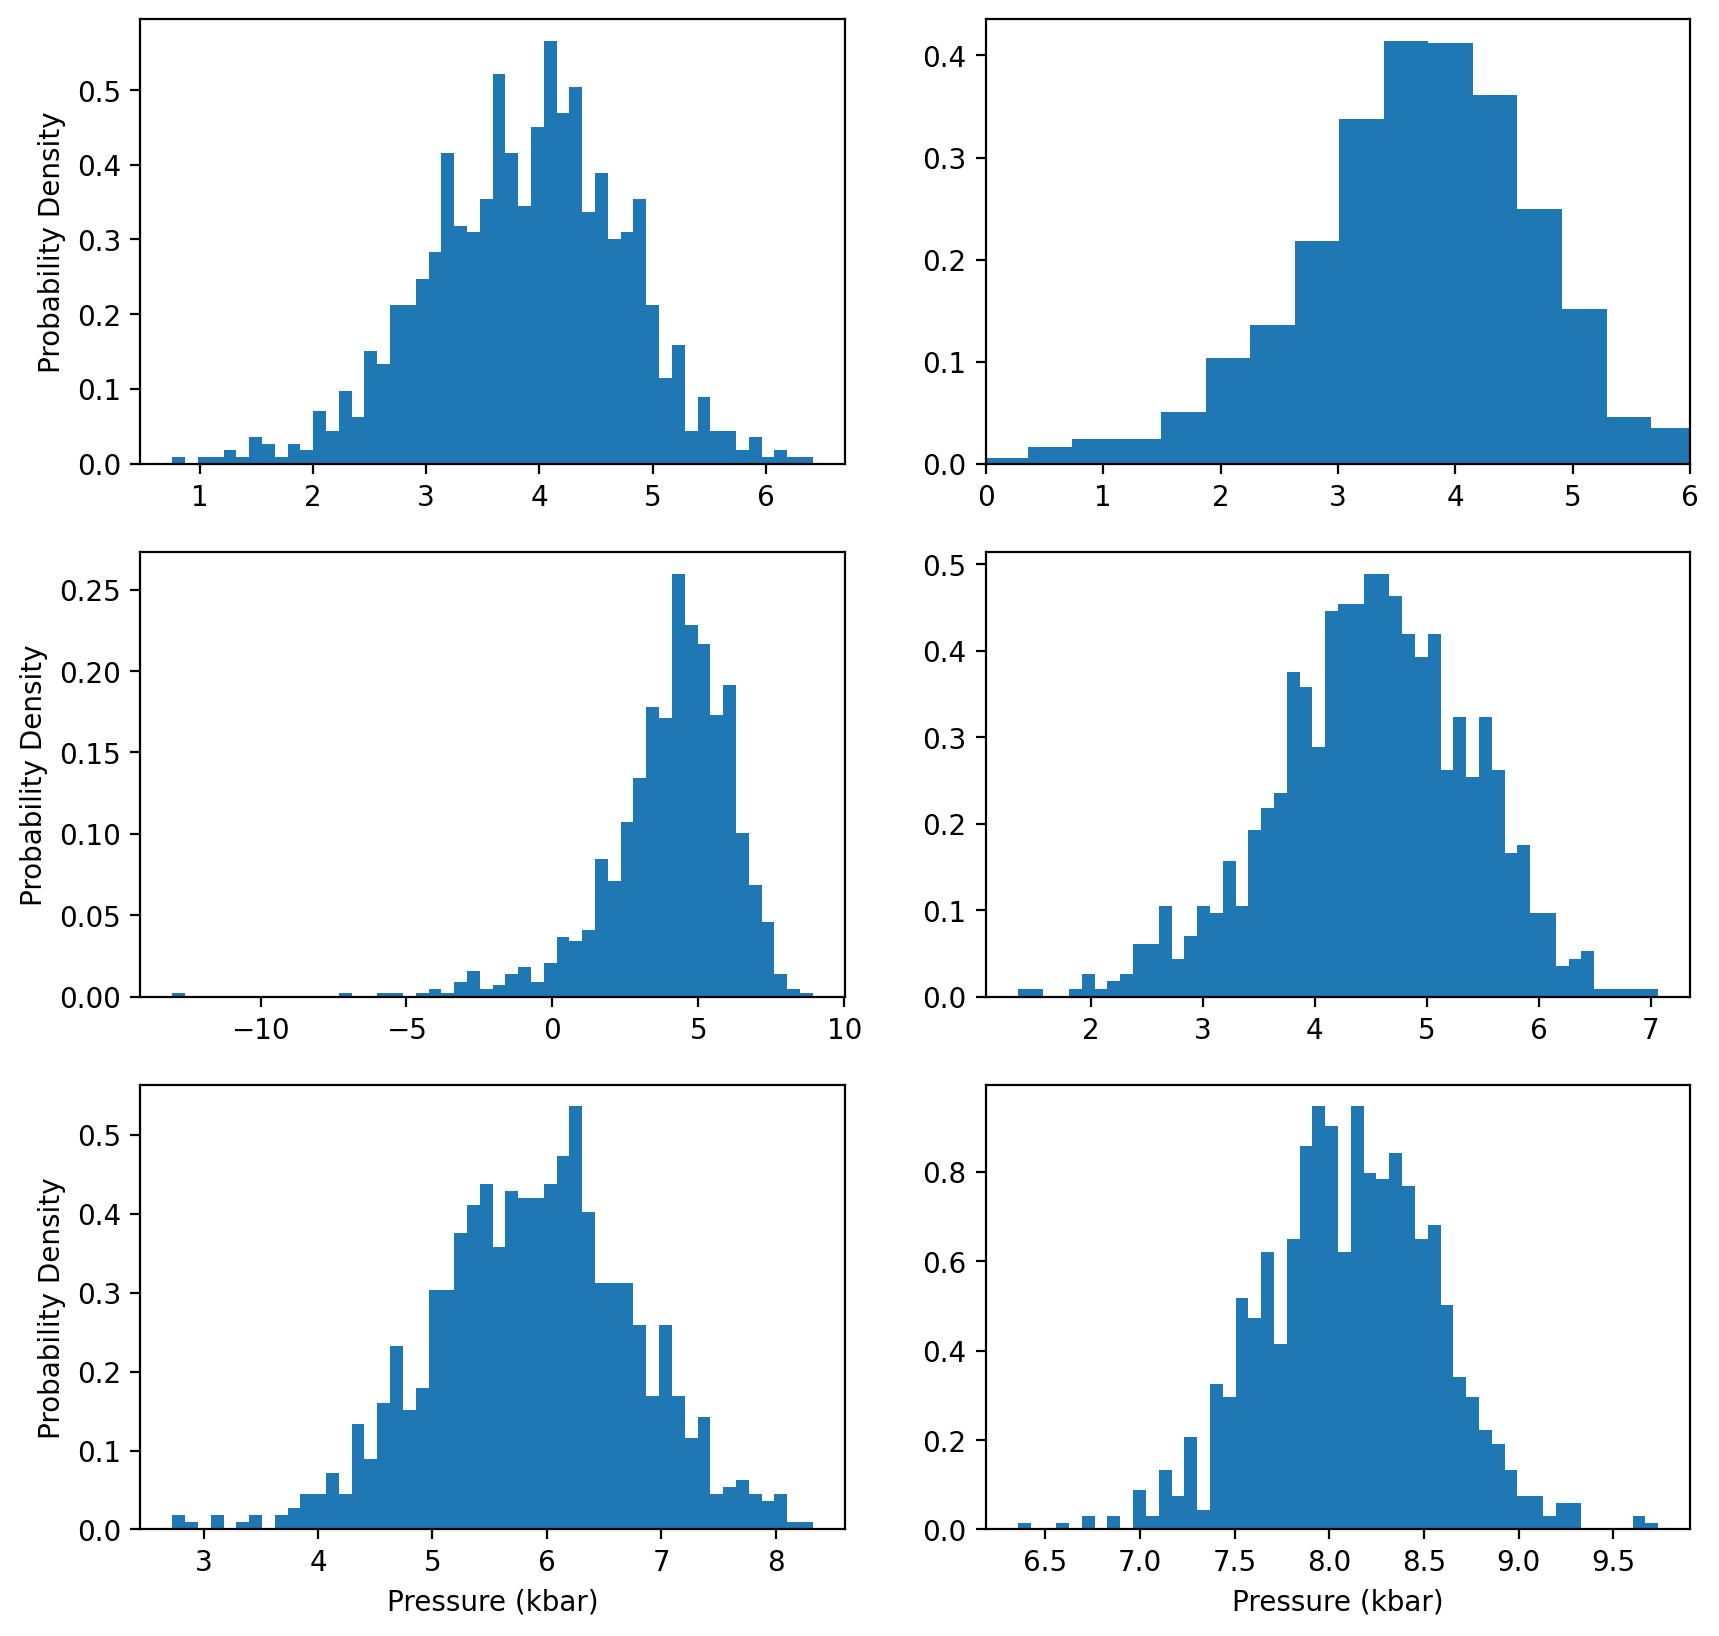

In [17]:
fig, ((ax1, ax2), (ax3, ax4), (ax5, ax6)) = plt.subplots(3, 2, figsize=(10, 10))

ax1.hist(Out_st_noise.loc[Out_st_noise['Sample_ID_Cpx_Num']==0, "P_kbar_calc"], bins=50, density = True)
ax2.hist(Out_st_noise.loc[Out_st_noise['Sample_ID_Cpx_Num']==1, "P_kbar_calc"], bins=50, density = True)
ax3.hist(Out_st_noise.loc[Out_st_noise['Sample_ID_Cpx_Num']==2, "P_kbar_calc"], bins=50, density = True)
ax4.hist(Out_st_noise.loc[Out_st_noise['Sample_ID_Cpx_Num']==3, "P_kbar_calc"], bins=50, density = True)
ax5.hist(Out_st_noise.loc[Out_st_noise['Sample_ID_Cpx_Num']==4, "P_kbar_calc"], bins=50, density = True)
ax6.hist(Out_st_noise.loc[Out_st_noise['Sample_ID_Cpx_Num']==5, "P_kbar_calc"], bins=50, density = True)
ax2.set_xlim([0, 6])
ax6.set_xlabel('Pressure (kbar)')
ax5.set_xlabel('Pressure (kbar)')
ax1.set_ylabel('Probability Density')
ax3.set_ylabel('Probability Density')
ax5.set_ylabel('Probability Density')

C:\Users\penny\anaconda3\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Text(0, 0.5, 'Probability Density')

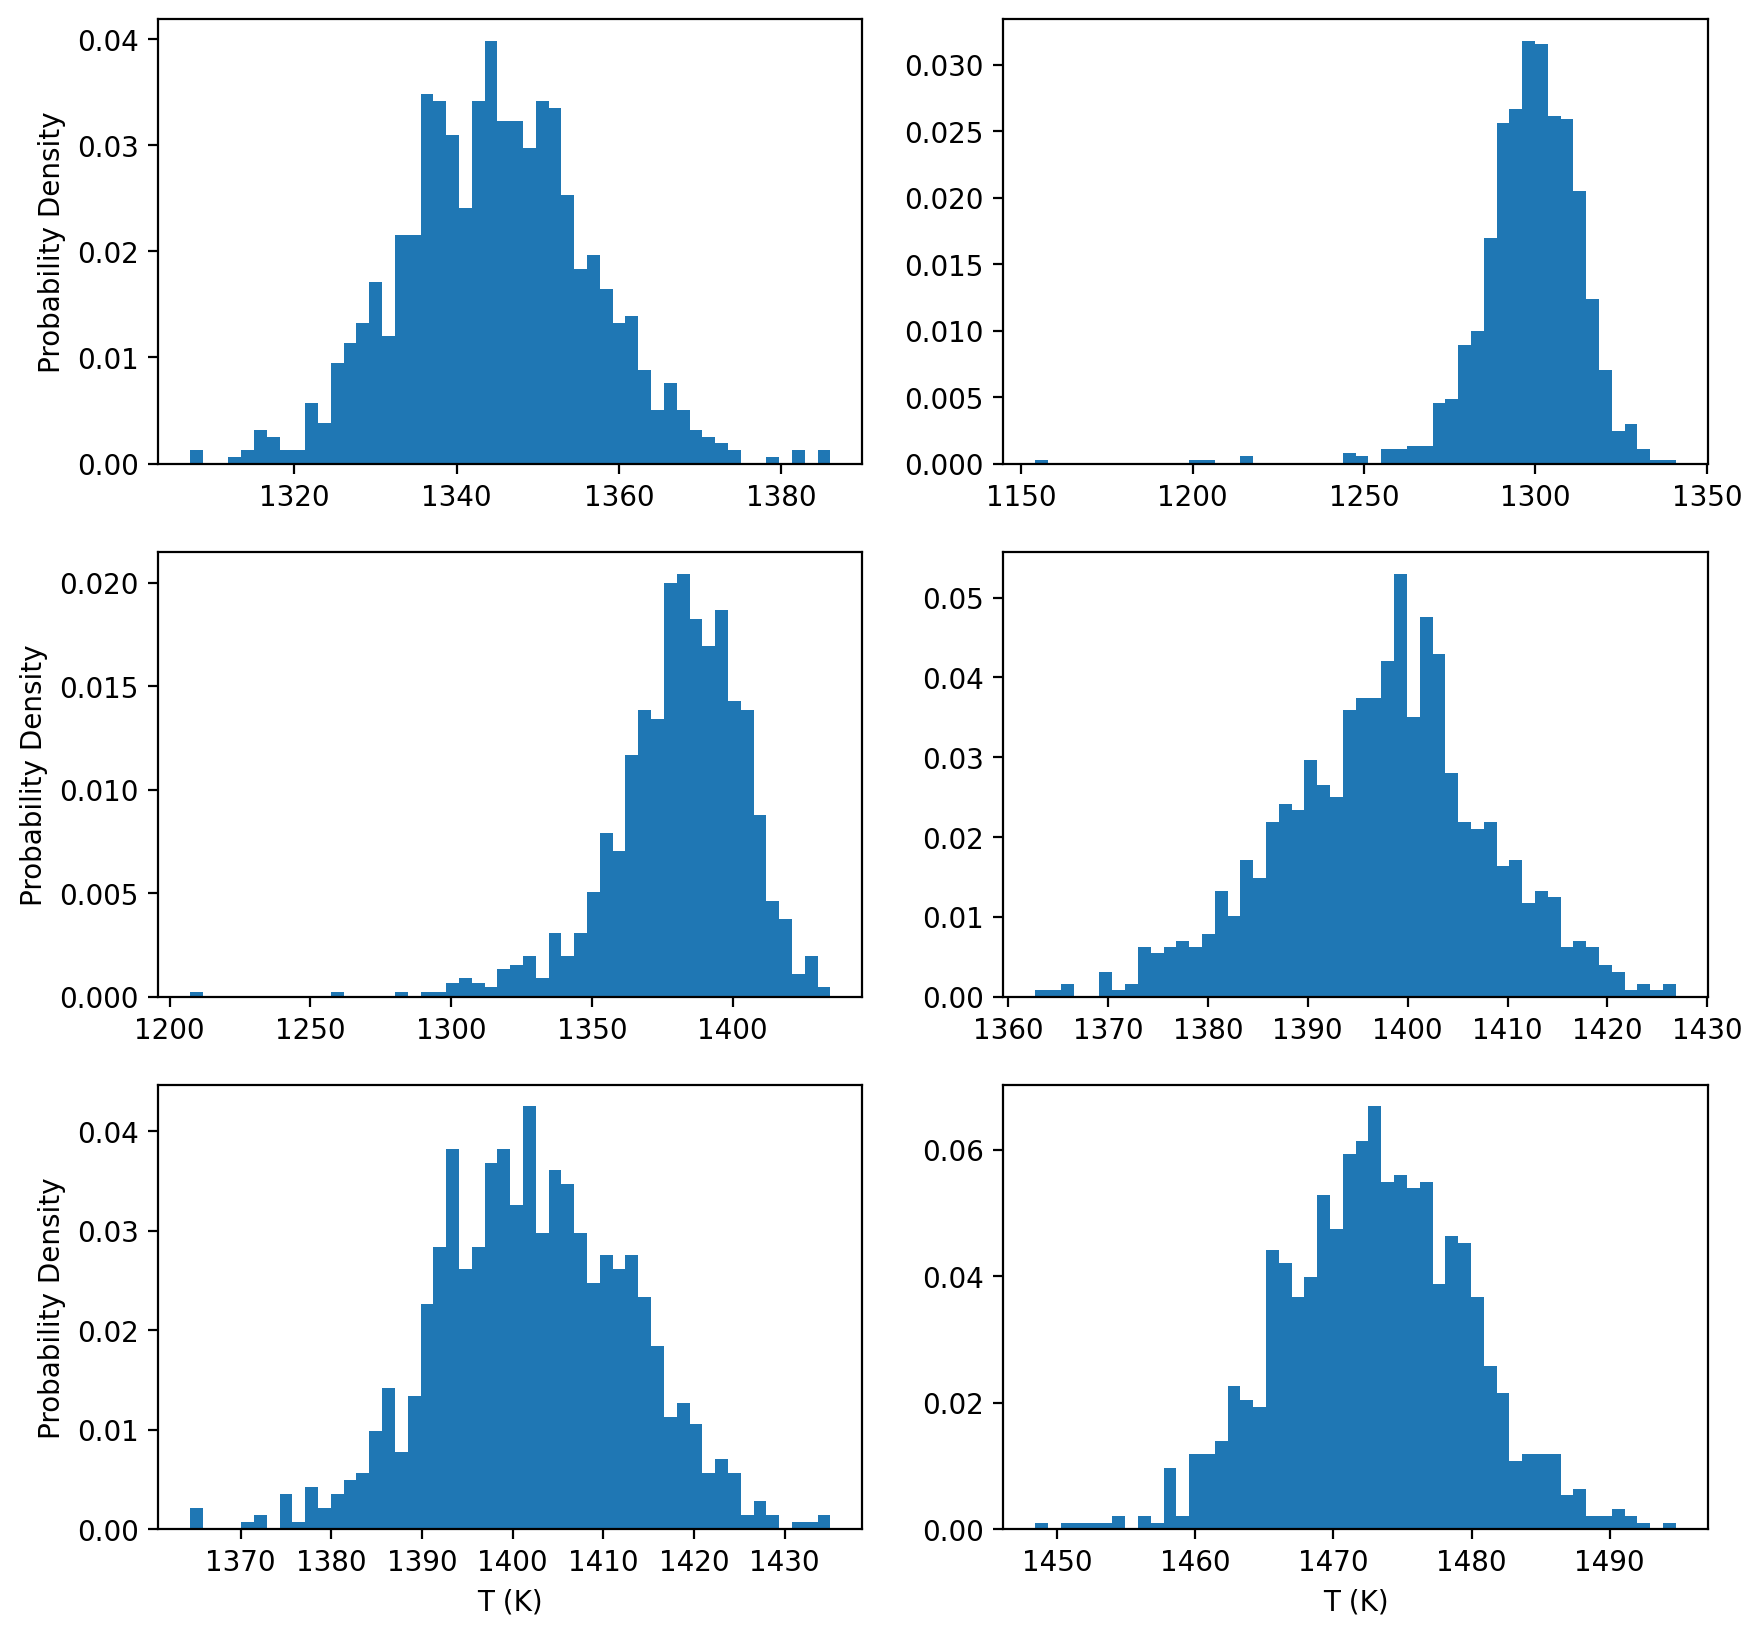

In [18]:
fig, ((ax1, ax2), (ax3, ax4), (ax5, ax6)) = plt.subplots(3, 2, figsize=(10, 10))

ax1.hist(Out_st_noise.loc[Out_st_noise['Sample_ID_Cpx_Num']==0, "T_K_calc"], bins=50, density = True)
ax2.hist(Out_st_noise.loc[Out_st_noise['Sample_ID_Cpx_Num']==1, "T_K_calc"], bins=50, density = True)
ax3.hist(Out_st_noise.loc[Out_st_noise['Sample_ID_Cpx_Num']==2, "T_K_calc"], bins=50, density = True)
ax4.hist(Out_st_noise.loc[Out_st_noise['Sample_ID_Cpx_Num']==3, "T_K_calc"], bins=50, density = True)
ax5.hist(Out_st_noise.loc[Out_st_noise['Sample_ID_Cpx_Num']==4, "T_K_calc"], bins=50, density = True)
ax6.hist(Out_st_noise.loc[Out_st_noise['Sample_ID_Cpx_Num']==5, "T_K_calc"], bins=50, density = True)
ax6.set_xlabel('T (K)')
ax5.set_xlabel('T (K)')
ax1.set_ylabel('Probability Density')
ax3.set_ylabel('Probability Density')
ax5.set_ylabel('Probability Density')

C:\Users\penny\anaconda3\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Text(0, 0.5, 'Probability Density')

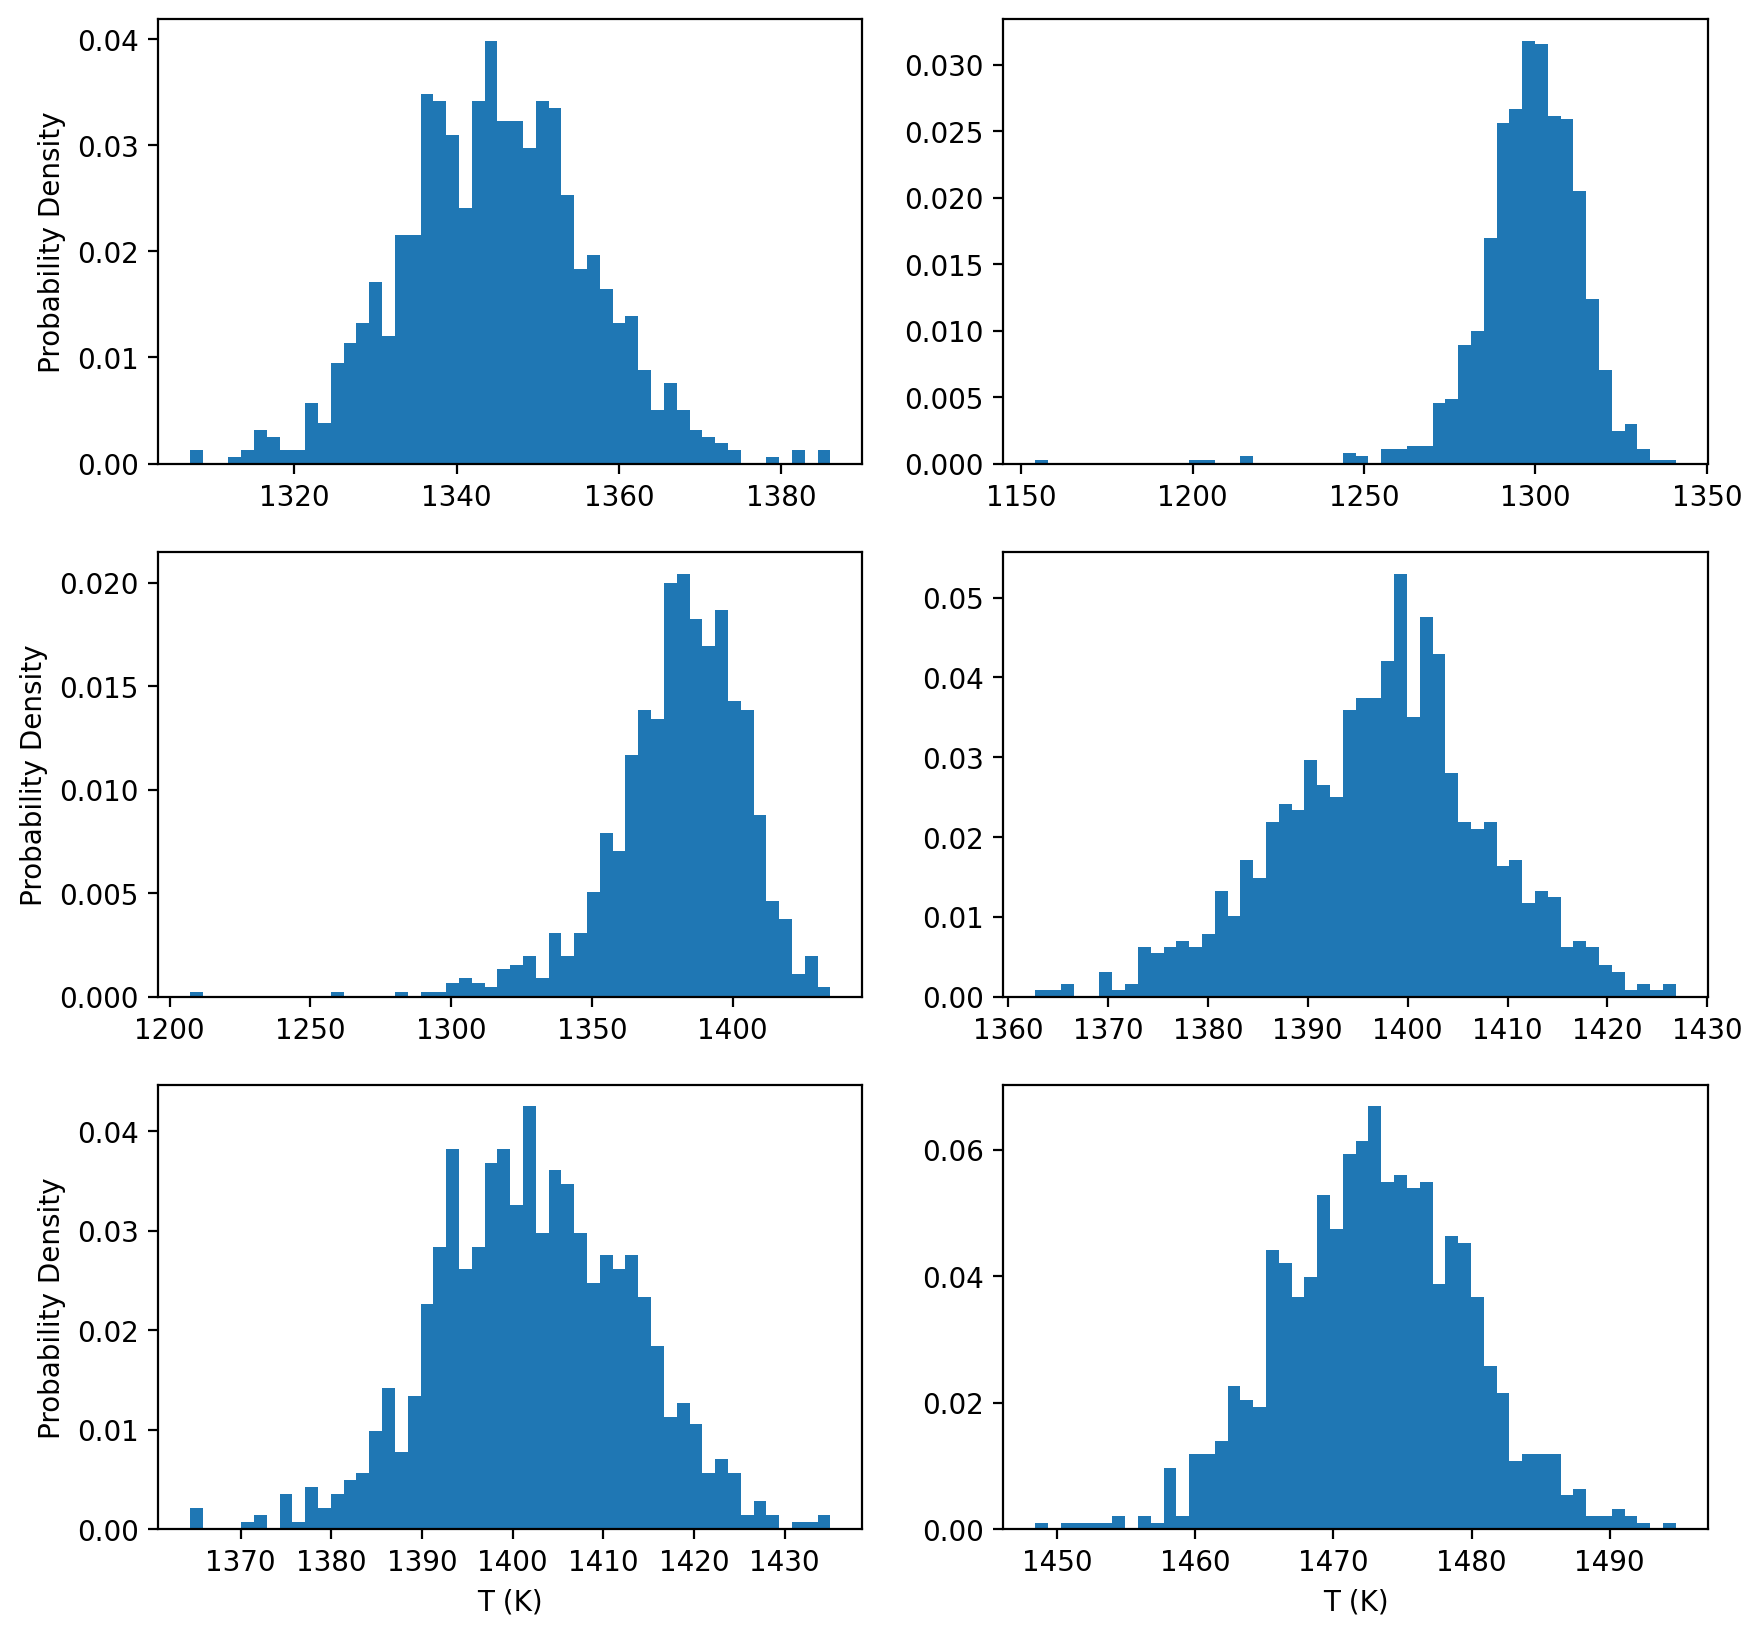

In [19]:
fig, ((ax1, ax2), (ax3, ax4), (ax5, ax6)) = plt.subplots(3, 2, figsize=(10, 10))

ax1.hist(Out_st_noise.loc[Out_st_noise['Sample_ID_Cpx_Num']==0, "T_K_calc"], bins=50, density = True)
ax2.hist(Out_st_noise.loc[Out_st_noise['Sample_ID_Cpx_Num']==1, "T_K_calc"], bins=50, density = True)
ax3.hist(Out_st_noise.loc[Out_st_noise['Sample_ID_Cpx_Num']==2, "T_K_calc"], bins=50, density = True)
ax4.hist(Out_st_noise.loc[Out_st_noise['Sample_ID_Cpx_Num']==3, "T_K_calc"], bins=50, density = True)
ax5.hist(Out_st_noise.loc[Out_st_noise['Sample_ID_Cpx_Num']==4, "T_K_calc"], bins=50, density = True)
ax6.hist(Out_st_noise.loc[Out_st_noise['Sample_ID_Cpx_Num']==5, "T_K_calc"], bins=50, density = True)
ax6.set_xlabel('T (K)')
ax5.set_xlabel('T (K)')
ax1.set_ylabel('Probability Density')
ax3.set_ylabel('Probability Density')
ax5.set_ylabel('Probability Density')